In [3]:
import pandas as pd
import numpy as py
from sklearn import linear_model         
import matplotlib.pyplot as plt          
from word2number import w2n              
import joblib      

In [5]:
df = pd.read_csv('csv\home.csv')
df

,area,bedroom,home_age,price
0,1800,3.0,10.0,150000
1,2200,4.0,12.0,120000
2,2600,5.0,NaN,100000
3,2900,NaN,14.0,80000
4,3100,8.0,NaN,70000
5,3400,9.0,16.0,65000
6,3900,9.0,18.0,60000


In [6]:
df = df.interpolate()
df

,area,bedroom,home_age,price
0,1800,3.0,10.0,150000
1,2200,4.0,12.0,120000
2,2600,5.0,13.0,100000
3,2900,6.5,14.0,80000
4,3100,8.0,15.0,70000
5,3400,9.0,16.0,65000
6,3900,9.0,18.0,60000


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedroom','home_age']],df.price)

LinearRegression()

In [8]:
reg.predict([[3400,9,26]])

array([76551.98776758])

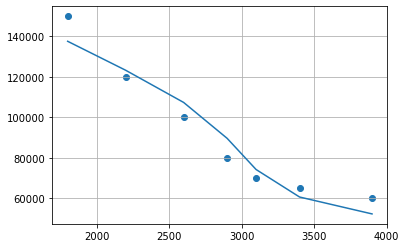

In [9]:
%matplotlib inline
plt.scatter(df.area,df.price)
plt.grid()
plt.plot(df.area,reg.predict(df[['area','bedroom','home_age']]))

In [13]:
joblib.dump(reg,'area_prediction')   #this function make train model file,so that next time we dont  need to train again.

['area_prediction']

In [16]:
load = joblib.load('area_prediction')

In [18]:
load.predict([[2000, 8,10]])

array([91634.99344693])

In [4]:
hr = pd.read_csv('csv\hr.csv')
hr


,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
hr.experience = hr.experience.fillna('zero')  #chnaged "experience" column NaN value to zero.
hr

,experience,test_score(out of 10),interview_score(out of 10),salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
hr = hr.interpolate()  # to fill NaN value uses interpolate()
hr

,experience,test_score(out of 10),interview_score(out of 10),salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [7]:
hr.experience = hr.experience.apply(w2n.word_to_num) #c

In [8]:
hr

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [11]:
reg = linear_model.LinearRegression()
reg.fit(hr[['experience','test_score(out of 10)','interview_score(out of 10)']],hr.salary)b

LinearRegression()

In [12]:
reg.predict([[1,6,7]])

array([46275.15302382])